### Gibbs Sampling: Example

In Gibbs sampling, at iteration $t$, an ordering of the $d$ subvectors of $\theta$ is chosen, and, in turn, each $\theta_j^t$ is sampled from the conditional distribution given all the other components of $\theta$:

$p(\theta_j|\theta_{-j}^{t-1},y),$

where $\theta_{-j}^{t-1}$ represents all the components of $\theta$, except for $\theta_j$ at their current value:

$\theta_{-j}^{t-1} = (\theta_1^t,\ldots,\theta_{j-1}^t,\theta_{j+1}^{t-1},\ldots,\theta_{d}^{t-1}).$

E.g., Bivariate normal distribution

Considering a single observation $(y_1, y_2)$ from a bivariate normally distributed distribution with unknown mean $\theta = (\theta_1, \theta_2)$ and known covariance $\begin{pmatrix}1 & \rho\\\rho & 1\end{pmatrix}.$  Assuming a uniform prior distribution on $\theta$, the posterior is:

$\begin{pmatrix}\theta_1 \\ \theta_2 \end{pmatrix}\bigg\vert y \sim \mathcal{N}\begin{pmatrix}\begin{pmatrix}y_1\\ y_2 \end{pmatrix},\begin{pmatrix}1 & \rho\\\rho & 1\end{pmatrix} \end{pmatrix}.$

A Gibbs sampler approach to this problem (bearing in mind that it is possible to draw directly from the joint posterior distribution in this case) relies on setting up the conditional posterior distributions, $\theta_1|\theta_2,y$ and $\theta_2|\theta_1,y.$  These will then be updated alternately:

$\theta_1|\theta_2,y \sim \mathcal{N}(y_1+\rho(\theta_2-y_2), 1-\rho^2)$

$\theta_2|\theta_1,y \sim \mathcal{N}(y_2+\rho(\theta_1-y_1), 1-\rho^2).$

Starting four independent sequences at $(\pm2.5, \pm2.5)$, we run a Gibbs sampler for a bivariate normal distribution with $\rho$=0.8, and the single data point $(y_1, y_2)=(0, 0)$.

In [1]:
!which python3

/Users/cb/miniconda3/envs/bda/bin/python3


In [2]:
#!pip install 'seaborn>=0.9'
# hopefully this didn't break any of the BDA3 requirements

In [3]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

In [20]:
# initialize samplers
# keys give sequences
theta1 = {0:[-2.5], 1:[-2.5], 2:[2.5], 3:[2.5]}
theta2 = {0:[-2.5], 1:[2.5], 2:[-2.5], 3:[2.5]}
rho = 0.8
y1 = 0.; y2 = 0.
# First 10 iterations
for ii in range(1, 10):
    for seq in range(4):
        theta1[seq].append(np.random.normal(loc=y1+rho*(theta2[seq][ii-1]-y2),
                                                       scale=(1.-rho**2)))
        theta2[seq].append(np.random.normal(loc=y2+rho*(theta1[seq][ii]-y1),
                                                       scale=(1.-rho**2)))        

Plot the first 10 iterations:

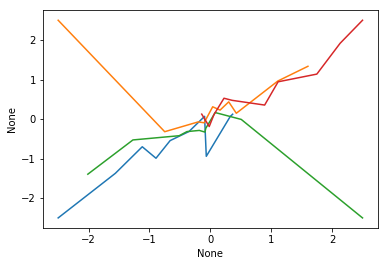

In [21]:
for seq in range(4):
    sns.lineplot(x=theta1[seq], y=theta2[seq])

Continue for another 500 iterations:

In [22]:
# First next 500 iterations
for ii in range(10, 510):
    for seq in range(4):
        theta1[seq].append(np.random.normal(loc=y1+rho*(theta2[seq][ii-1]-y2),
                                                       scale=(1.-rho**2)))
        theta2[seq].append(np.random.normal(loc=y2+rho*(theta1[seq][ii]-y1),
                                                       scale=(1.-rho**2)))


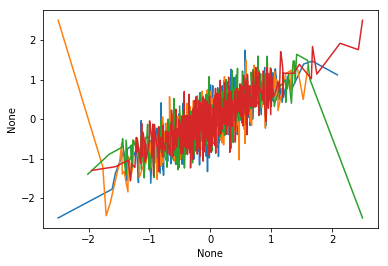

In [23]:
for seq in range(4):
    sns.lineplot(x=theta1[seq], y=theta2[seq], markers=True)

Plot the points from the last 250 iterations of each sequence:

In [24]:
theta1_samples = []
theta2_samples = []
for seq in range(4):
    theta1_samples.extend(theta1[seq][-250:])
    theta2_samples.extend(theta2[seq][-250:])

/Users/cb/miniconda3/envs/bda/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


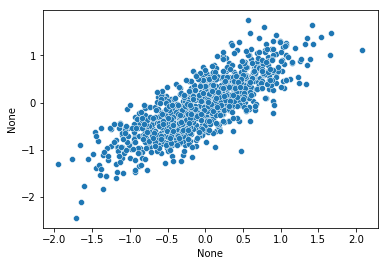

In [25]:
sns.scatterplot(theta1_samples,
                theta2_samples)